# Observing reconstruction images by Contractive Convolutional Auto-Encoder.

This notebook demonstrates that the Convolutional Auto-Encoder can learn images and reconstruct its. Image data set for this demo is the [Weizmann horse dataset](https://avaminzhang.wordpress.com/2012/12/07/%E3%80%90dataset%E3%80%91weizmann-horses/).

Firstly, import Python and Cython modules for building Convolutional Auto-Encoder.

In [1]:
from pydbm.cnn.convolutionalneuralnetwork.convolutionalautoencoder.contractive_convolutional_auto_encoder import ContractiveConvolutionalAutoEncoder
from pydbm.cnn.layerablecnn.convolution_layer import ConvolutionLayer as ConvolutionLayer1
from pydbm.cnn.layerablecnn.convolution_layer import ConvolutionLayer as ConvolutionLayer2
from pydbm.cnn.featuregenerator.image_generator import ImageGenerator

In [2]:
from pydbm.activation.relu_function import ReLuFunction
from pydbm.activation.tanh_function import TanhFunction
from pydbm.activation.identity_function import IdentityFunction

from pydbm.activation.logistic_function import LogisticFunction
from pydbm.loss.mean_squared_error import MeanSquaredError
from pydbm.optimization.optparams.adam import Adam

In [3]:
from pydbm.synapse.cnn_graph import CNNGraph as ConvGraph1
from pydbm.synapse.cnn_graph import CNNGraph as ConvGraph2

In [4]:
from pydbm.verification.verificate_function_approximation import VerificateFunctionApproximation

Set hyperparameters of feature points in image data.

In [5]:
batch_size = 10
channel = 3
height = 100
width = 100
scale = 0.1

Instantiate objects and call the method.

In [6]:
conv1 = ConvolutionLayer1(
    ConvGraph1(
        activation_function=IdentityFunction(),
        filter_num=batch_size,
        channel=channel,
        kernel_size=3,
        scale=scale,
        stride=1,
        pad=1
    )
)

conv2 = ConvolutionLayer2(
    ConvGraph2(
        activation_function=LogisticFunction(),
        filter_num=batch_size,
        channel=batch_size,
        kernel_size=3,
        scale=scale,
        stride=1,
        pad=1
    )
)

cnn = ContractiveConvolutionalAutoEncoder(
    layerable_cnn_list=[
        conv1, 
        conv2
    ],
    epochs=100,
    batch_size=batch_size,
    learning_rate=1e-05,
    learning_attenuate_rate=0.1,
    attenuate_epoch=25,
    computable_loss=MeanSquaredError(),
    opt_params=Adam(),
    verificatable_result=VerificateFunctionApproximation(),
    test_size_rate=0.3,
    tol=1e-15,
    save_flag=False
)

# Positive hyperparameter that controls the strength of the regularization.
cnn.penalty_lambda = 1.0

feature_generator = ImageGenerator(
    epochs=100,
    batch_size=batch_size,
    training_image_dir="../../../../../Downloads/rgb/",
    test_image_dir="../../../../../Downloads/rgb/",
    seq_len=None,
    gray_scale_flag=False,
    wh_size_tuple=(100, 100),
    norm_mode="z_score"
)

In [7]:
from logging import getLogger, StreamHandler, NullHandler, DEBUG, ERROR

logger = getLogger("pydbm")
handler = StreamHandler()
handler.setLevel(DEBUG)
logger.setLevel(DEBUG)
logger.addHandler(handler)

Execute learning.

In [8]:
cnn.learn_generated(feature_generator)

CNN starts learning.
Generate training data: (10, 3, 100, 100)
Generate test data: (10, 3, 100, 100)
Best params are updated.
Epoch: 1
Loss: 
Training: 0.011599220661929959 Test: 0.0077615018087129825
Generate training data: (10, 3, 100, 100)
Generate test data: (10, 3, 100, 100)
Best params are updated.
Epoch: 2
Loss: 
Training: 0.011785073993488717 Test: 0.010403401966702962
Generate training data: (10, 3, 100, 100)
Generate test data: (10, 3, 100, 100)
Best params are updated.
Epoch: 3
Loss: 
Training: 0.011621638336567878 Test: 0.009405024213439632
Generate training data: (10, 3, 100, 100)
Generate test data: (10, 3, 100, 100)
Epoch: 4
Loss: 
Training: 0.012046833327627262 Test: 0.01019117844799871
Generate training data: (10, 3, 100, 100)
Generate test data: (10, 3, 100, 100)
Epoch: 5
Loss: 
Training: 0.012208217210256228 Test: 0.008683695849838538
Generate training data: (10, 3, 100, 100)
Generate test data: (10, 3, 100, 100)
Epoch: 6
Loss: 
Training: 0.011188439033292447 Test: 0

Generate test data: (10, 3, 100, 100)
Epoch: 37
Loss: 
Training: 0.009801057769016476 Test: 0.009191798531642602
Rolling mean of Loss (Window is 10): 
Training: 0.009693969697877964 Test: 0.00911392673866983
Generate training data: (10, 3, 100, 100)
Generate test data: (10, 3, 100, 100)
Epoch: 38
Loss: 
Training: 0.009778638662714067 Test: 0.009133324694647877
Rolling mean of Loss (Window is 10): 
Training: 0.009697505286981828 Test: 0.009122517661782606
Generate training data: (10, 3, 100, 100)
Generate test data: (10, 3, 100, 100)
Epoch: 39
Loss: 
Training: 0.009871913794495693 Test: 0.009118600857336848
Rolling mean of Loss (Window is 10): 
Training: 0.009717014641933232 Test: 0.009129766036095246
Generate training data: (10, 3, 100, 100)
Generate test data: (10, 3, 100, 100)
Epoch: 40
Loss: 
Training: 0.009821722655280895 Test: 0.009150046474033764
Rolling mean of Loss (Window is 10): 
Training: 0.009737566079557464 Test: 0.009145073710714765
Generate training data: (10, 3, 100, 10

Generate training data: (10, 3, 100, 100)
Generate test data: (10, 3, 100, 100)
Epoch: 70
Loss: 
Training: 0.00966539803694222 Test: 0.009694936469260203
Rolling mean of Loss (Window is 10): 
Training: 0.00961595633013323 Test: 0.009597280313669215
Generate training data: (10, 3, 100, 100)
Generate test data: (10, 3, 100, 100)
Epoch: 71
Loss: 
Training: 0.009509438215038019 Test: 0.009776456221899276
Rolling mean of Loss (Window is 10): 
Training: 0.0096321903504316 Test: 0.009606048205684573
Generate training data: (10, 3, 100, 100)
Generate test data: (10, 3, 100, 100)
Epoch: 72
Loss: 
Training: 0.009708216509148788 Test: 0.009532998193551814
Rolling mean of Loss (Window is 10): 
Training: 0.009613191368045271 Test: 0.009624537332981463
Generate training data: (10, 3, 100, 100)
Generate test data: (10, 3, 100, 100)
Epoch: 73
Loss: 
Training: 0.009643860136619182 Test: 0.009868454807794705
Rolling mean of Loss (Window is 10): 
Training: 0.00960080475059254 Test: 0.009625765481512748
G

## Extract reconstruction images.

The object `cnn` which is-a `ConvolutionalAutoEncoder` has a method `inference` to be able to reconstruct observed data points as feature points. The input test data and reconstructed data are as follows.

Generate training data: (10, 3, 100, 100)
Generate test data: (10, 3, 100, 100)


test data:


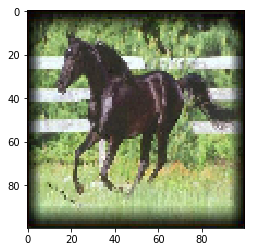

reconstructed data:


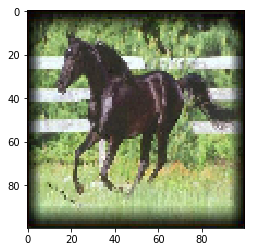

test data:


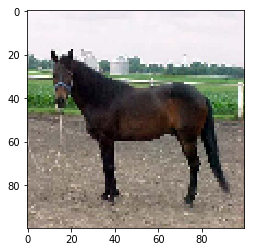

reconstructed data:


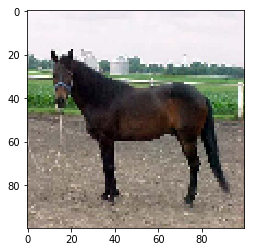

test data:


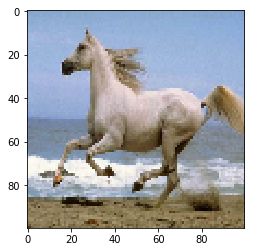

reconstructed data:


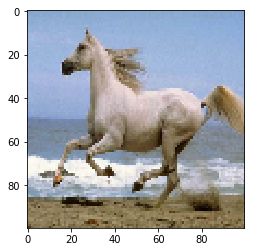

test data:


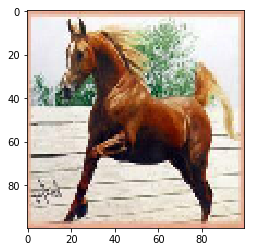

reconstructed data:


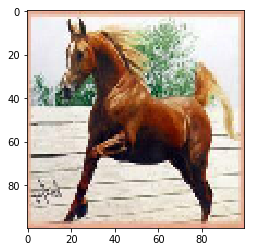

test data:


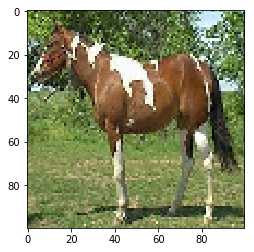

reconstructed data:


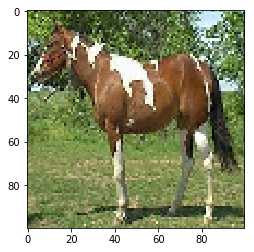

test data:


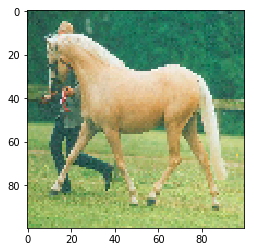

reconstructed data:


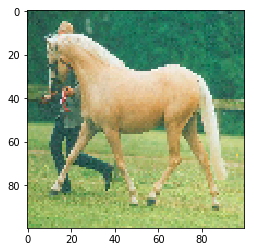

test data:


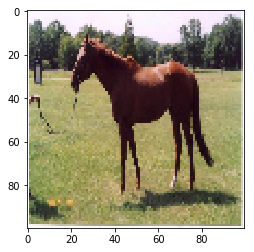

reconstructed data:


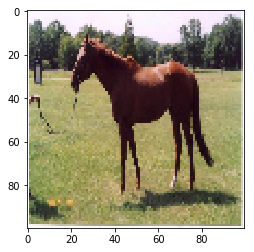

test data:


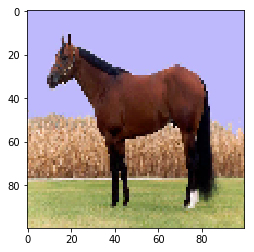

reconstructed data:


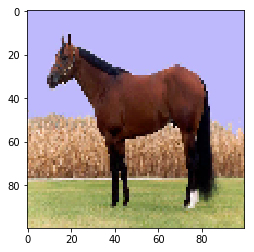

test data:


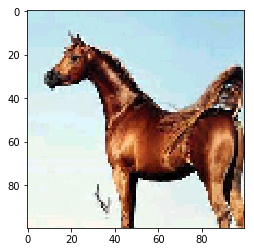

reconstructed data:


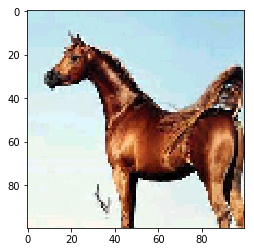

test data:


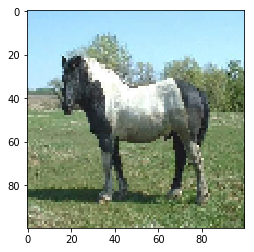

reconstructed data:


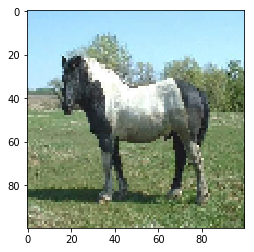

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def plot(arr):
    arr = 255 * (arr - arr.min()) / (arr.max() - arr.min())
    arr = arr.transpose(1, 2, 0).astype(np.uint8)
    plt.imshow(arr)
    plt.show()
    plt.close()

test_len = 0
test_limit = 1

test_arr_list = []
rec_arr_list = []
for batch_observed_arr, batch_target_arr, test_batch_observed_arr, test_batch_target_arr in feature_generator.generate():
    test_len += 1
    result_arr = cnn.inference(test_batch_observed_arr)
    for batch in range(test_batch_target_arr.shape[0]):
        test_batch_target_arr = (test_batch_target_arr - test_batch_target_arr.min()) / (test_batch_target_arr.max() - test_batch_target_arr.min())
        print("test data:")
        plot(test_batch_target_arr[batch])
        test_arr_list.append(test_batch_target_arr[batch][0])
        print("reconstructed data:")
        plot(test_batch_target_arr[batch])
    if test_len >= test_limit:
        break
